In [1]:
#importing libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size images
image_size = [224, 224]

In [3]:
train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folder = glob('Dataset/Train/*')

In [7]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
pred = Dense(len(folder), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=pred)

# view the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


Epoch 1/5
13/13 [==============================] - 159s 12s/step - loss: 1.6000 - accuracy: 0.5457 - val_loss: 0.6416 - val_accuracy: 0.6791
Epoch 2/5
13/13 [==============================] - 161s 12s/step - loss: 0.8069 - accuracy: 0.6034 - val_loss: 1.2724 - val_accuracy: 0.4925
Epoch 3/5
13/13 [==============================] - 168s 13s/step - loss: 0.7224 - accuracy: 0.6514 - val_loss: 0.5446 - val_accuracy: 0.7463
Epoch 4/5
13/13 [==============================] - 167s 13s/step - loss: 0.4862 - accuracy: 0.7572 - val_loss: 0.3864 - val_accuracy: 0.7612
Epoch 5/5
13/13 [==============================] - 166s 13s/step - loss: 0.3473 - accuracy: 0.8630 - val_loss: 0.8592 - val_accuracy: 0.6940


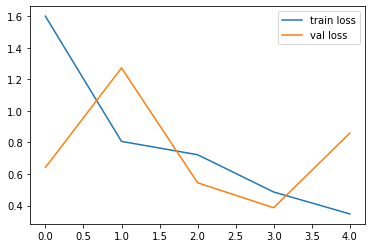

<Figure size 432x288 with 0 Axes>

In [11]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

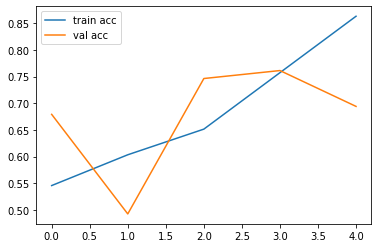

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
import tensorflow as tf

from keras.models import load_model

model.save('model_malaria_vgg19.h5')